In [68]:
import pymaster as nmt
import numpy as np
import matplotlib.pyplot as plt
import healpy
from astropy.io import fits
import matplotlib.pyplot as plt

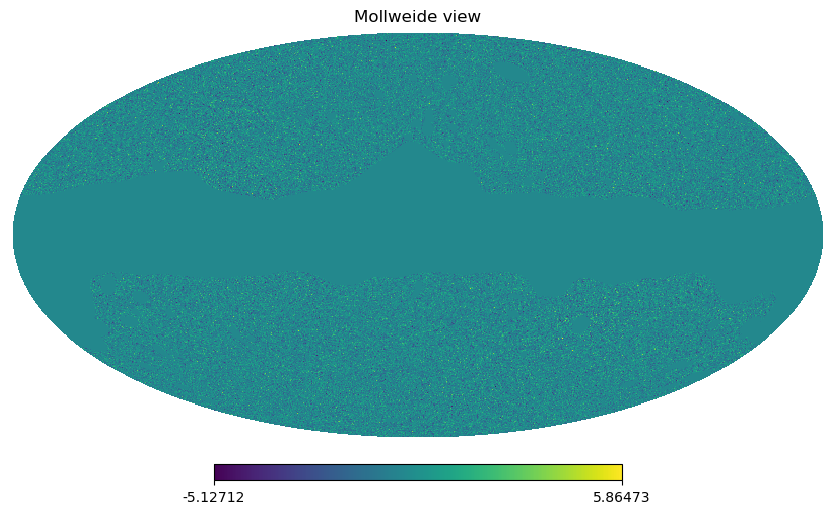

In [59]:
mask = healpy.read_map("data/planck/mask.fits.gz")
nside = healpy.get_nside(mask)
alms = healpy.read_alm("data/planck/PR4_klm_dat_p.fits")
alms[0] = 0
cmb_kappa = healpy.alm2map(alms, nside=nside)
cmb_kappa[mask == 0] = 0
healpy.mollview(cmb_kappa)


In [74]:
# Choose binning; matches the PR4 lensing paper
ell_min = 8
ell_max = 400
n_ell = 10
ell_edges = np.linspace(ell_min, ell_max, n_ell).astype(int)
ell_bins = nmt.NmtBin.from_edges(ell_edges[:-1], ell_edges[1:], is_Dell=False)

cmb_kappa_field = nmt.NmtField(mask, [cmb_kappa], n_iter=0, lmax=ell_max-1)


space = nmt.NmtWorkspace()
space.compute_coupling_matrix(cmb_kappa_field, cmb_kappa_field, ell_bins, is_teb=False)
 

In [78]:
cl_guess = nmt.compute_coupled_cell(cmb_kappa_field, cmb_kappa_field) / np.mean(mask * mask)

c = nmt.compute_full_master(
    cmb_kappa_field,
    cmb_kappa_field,
    ell_bins,
    cl_guess=cl_guess,
    workspace=space,
)


(2049,)

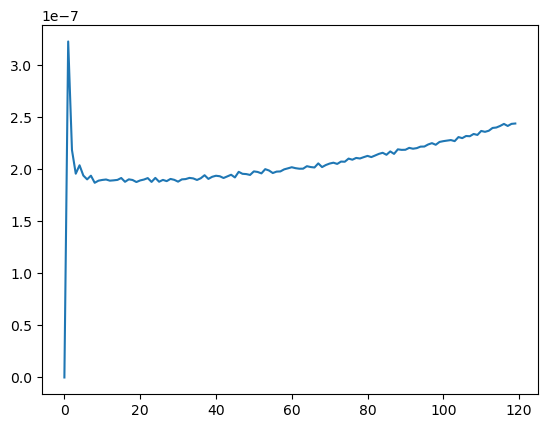

In [94]:
noise_spectrum = np.loadtxt("data/planck/PR42018like_nlkk_p.dat")
plt.plot(noise_spectrum[:120])
noise_spectrum.shape

Text(0.5, 1.0, 'Bandpowers')

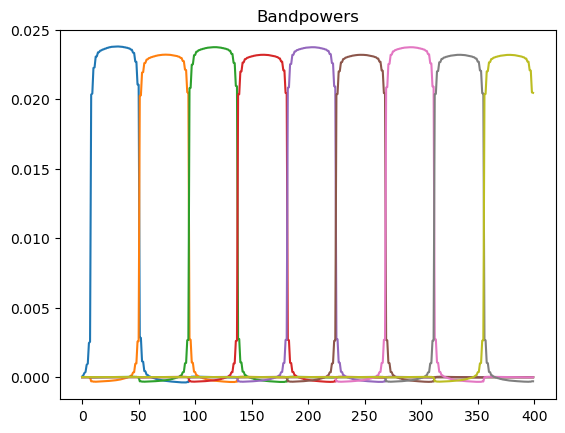

In [92]:
bandpowers = space.get_bandpower_windows()
plt.figure()
for i in range(n_ell - 1):
    plt.plot(bandpowers[0, i, 0, :])
plt.title("Bandpowers")


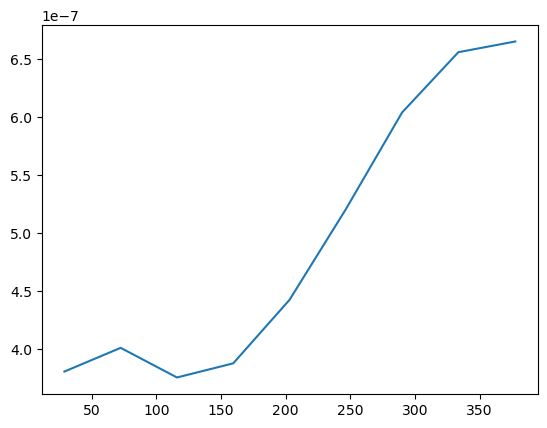

In [93]:


plt.figure()
ell = ell_bins.get_effective_ells()
factor = 1e7 * ell ** 2 * (ell + 1) ** 2 / (2 * np.pi)
factor = 1
plt.plot(ell, c[0, :] * factor, label="CMB lensing auto")
